# Abstract

Target
The target of this project was to produce player lines for each of the following attributes:

    - Points
    - 3 Pointers
    - Assists
    - Rebounds
    - Steals
    - Blocks

The lines projected were 0.5 over under lines, meaning there was a 50% chance a player score more or less than that number


#### Methodology
The main methodology used was Monte Carlo simulations. This was to take into account the degree of randomness in predicting game outcomes. The output is two csv's including all game lines for all players. One for home, and one for away.


#### Critics

This generally worked well for those metrics with higher values (Points, 3 pointers) but far less effectively for metrics with much lower values, such as blocks. Further work should be done to evaluate how accurate the model is at predicting these.

Some of the data provided was not used, and could certainly have proved useful. This is addressed at the end, dicusing future work.

# Contents

1. [Data Import](#Data-Import) <br>
2. [Data Cleaning](#Data-Cleaning)<br>
3. [Initial Data Exploration](#Data-Exploration)<br> 
   - [Categorical Visualizations](#Categorical-Visualizations)
   -  [Top Player Analysis](#Top-Player-Analysis)
   - [Minutes Played](#Minutes-Played)<br>
   
4. [Inital Game Result Simulation - Team Level](#Game-Result-Simulation)<br>
5. [Simulating One Game - Player Level](#Simulating-One-Game)
   - [Points Scored](#Points-Scored)
   -  [3 Pointers](#3-Pointers)
   - [Minutes Played](#Minutes-Played)
   - [Assists, Rebounds, Blocks and Steals](#Assists-Rebounds-Blocks-and-Steals)<br>
   
6. [Multiple Game Simulations](#Multiple-Game-Simulations)<br>

7. [Full Game Simulation](#Full-Game-Simulation)

8. [Converting to Game Lines](#Converting-to-Game-Lines)<br>
9. [Moving Forward](#Moving-Forward)


In [498]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline

## Data Import

In [20]:
df = pd.read_csv('basic_per_game_player_stats_2013_2018.csv')

In [21]:
df.shape

(129921, 33)

# Data Cleaning

In [22]:
df.loc[df['Unnamed: 6'].isna(), 'Unnamed: 6'] = 'Home'
df.loc[df['Unnamed: 6'] == '@', 'Unnamed: 6'] = 'Away'

In [23]:
pd.set_option('display.max_columns', 500)
df.loc[df['FG%'].isna()]['FG'].unique() # All NaN's in FG% are due to the fact the player made no FG or FGA

array([0])

In [24]:
df.loc[df['FG%'].isna()]['FGA'].unique()

array([0])

In [25]:
df.loc[df['FG%'].isna(), 'FG%'] = 0 # Setting the FG% to zero for simplicity.
df.loc[df['2P%'].isna(), '2P%'] = 0 # same issue with 2P%
df.loc[df['FT%'].isna(), 'FT%'] = 0 # Same issue with FT%
df.loc[df['3P%'].isna(), '3P%'] = 0

In [26]:
df = df.rename(columns={'Unnamed: 6': 'Location', 'Unnamed: 8': 'Result'})

In [27]:
df['Age'] = df['Age'].apply(lambda x: round(int(x[:2])+(int(x[3:])/365),3)) # Changing age from 'years - days' format

In [28]:
df['Date'] = pd.to_datetime(df['Date'])

# Data Exploration

In [29]:
df.head()

,Rk,Player,Age,Pos,Date,Tm,Location,Opp,Result,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,1,Devin Booker\bookede01,20.397,G,2017-03-24,PHO,Away,BOS,L,1,45,21,40,0.525,17,29,0.586,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,70,54.5
1,2,Carmelo Anthony\anthoca01,29.658,F,2014-01-24,NYK,Home,CHA,W,1,39,23,35,0.657,17,24,0.708,6,11,0.545,10,10,1.000,1,12,13,0,0,0,0,1,62,50.6
2,3,LeBron James\jamesle01,29.173,F-G,2014-03-03,MIA,Home,CHA,W,1,41,22,33,0.667,14,23,0.609,8,10,0.800,9,12,0.750,3,4,7,4,0,0,2,2,61,48.8
3,4,Kobe Bryant\bryanko01,37.641,G-F,2016-04-13,LAL,Home,UTA,W,1,42,22,50,0.440,16,29,0.552,6,21,0.286,10,12,0.833,0,4,4,4,1,1,2,1,60,36.3
4,5,James Harden\hardeja01,28.430,G,2018-01-30,HOU,Home,ORL,W,1,46,19,30,0.633,14,16,0.875,5,14,0.357,17,18,0.944,2,8,10,11,4,1,5,2,60,56.6


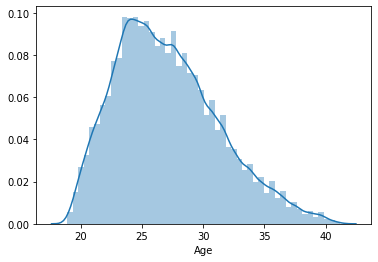

In [13]:
sns.distplot(df['Age'])

In [295]:
cat_cols = ['Player', 'Pos', 'Tm','Location','Opp', 'Result']
date_col = ['Date']
num_cols = [x for x in df.columns if x not in cat_cols + date_col]

##  Categorical Visualizations

In [18]:
def plot_boxplot(column):
    sns.boxplot(x=df[column], y=df['PTS'])
    plt.ylabel('Points')
    plt.xticks(rotation = 60)
    plt.show()

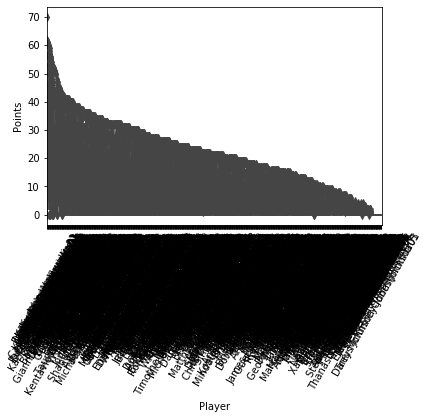

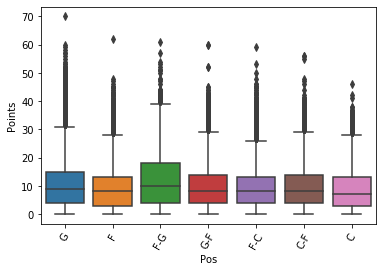

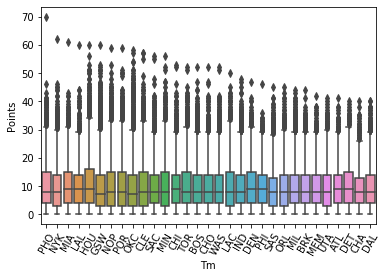

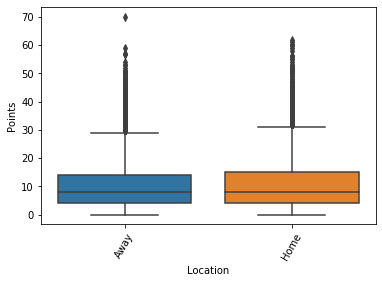

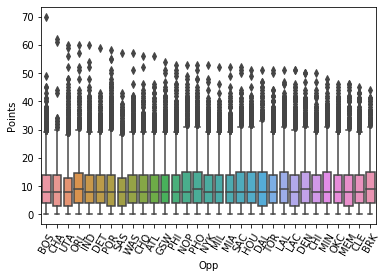

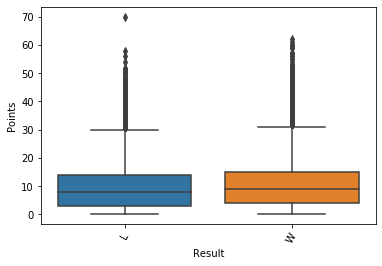

In [19]:
for i in cat_cols:
    plot_boxplot(i)

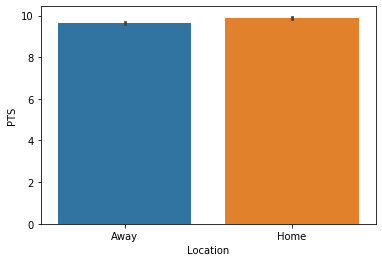

In [291]:
sns.barplot(x = 'Location', y = 'PTS', data = df)

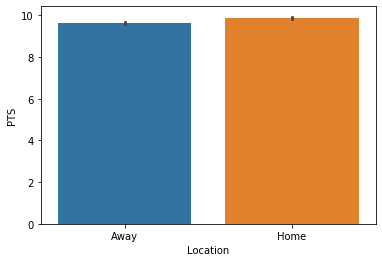

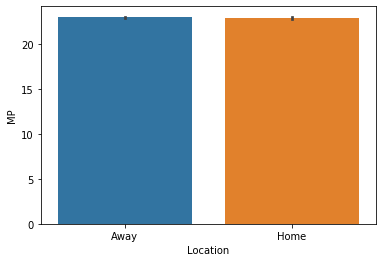

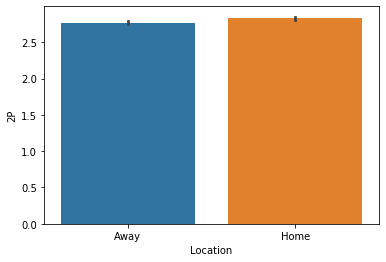

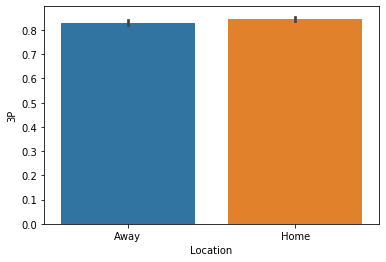

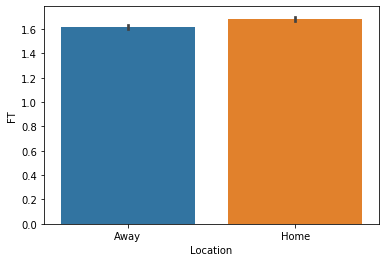

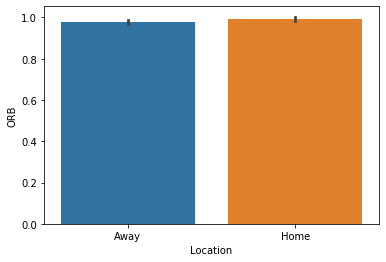

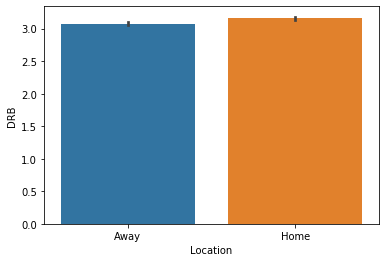

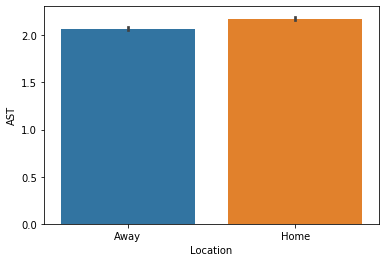

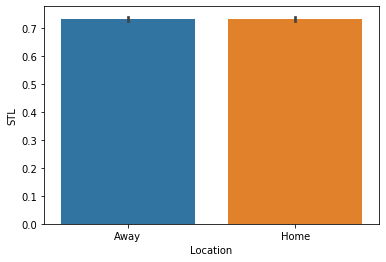

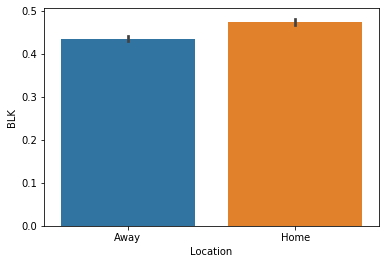

In [551]:
for m in metrics:
    sns.barplot(x = 'Location', y = m, data = df)
    plt.show()

Text(0.5, 1.0, 'Average Blocks per player by location')

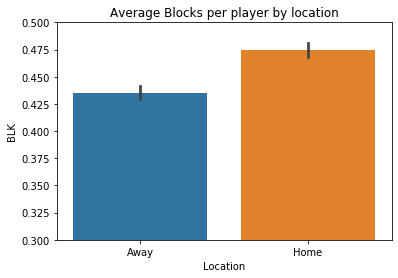

In [578]:
sns.barplot(x = 'Location', y = 'BLK', data = df)
plt.ylim(0.3, 0.5)
plt.title('Average Blocks per player by location')

In [ ]:
sns.barplot(x = 'Location', y = 'PTS', data = df)
plt.ylim(8, 10)
plt.title('Average points per player by location')

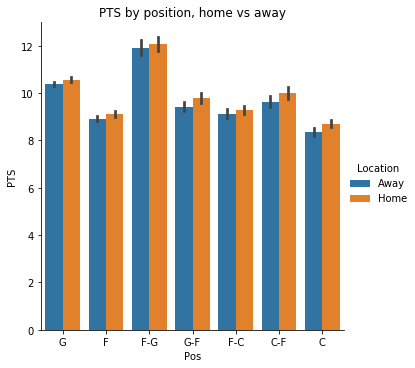

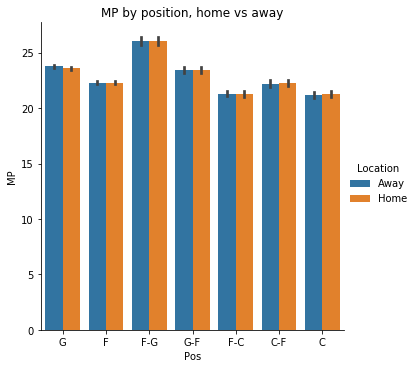

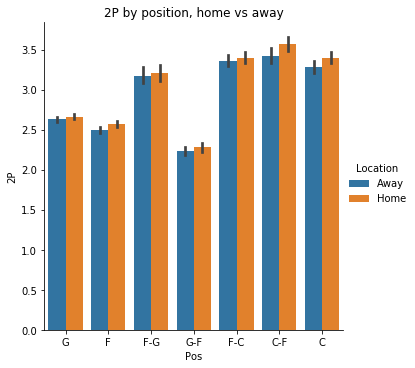

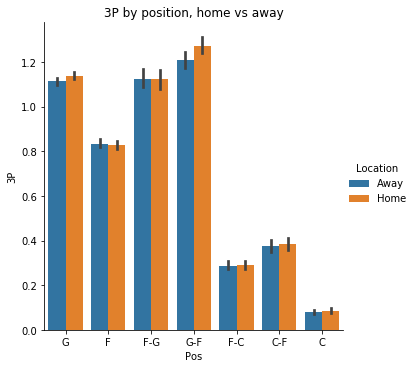

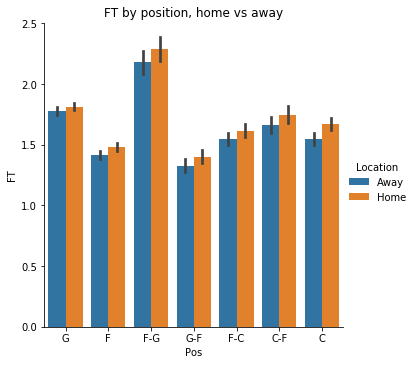

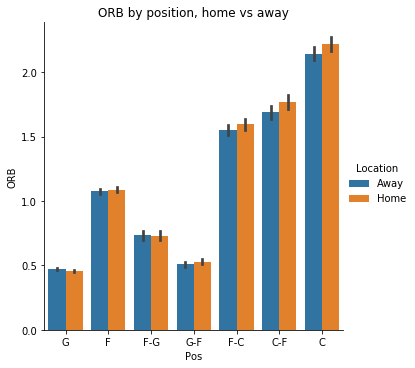

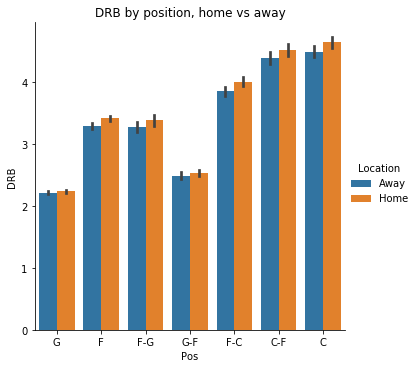

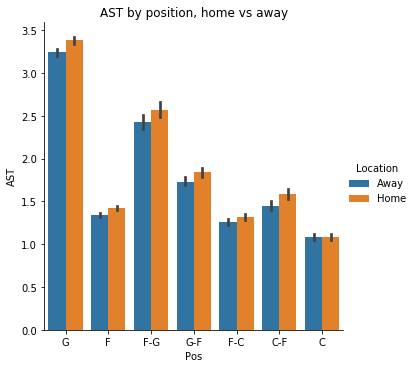

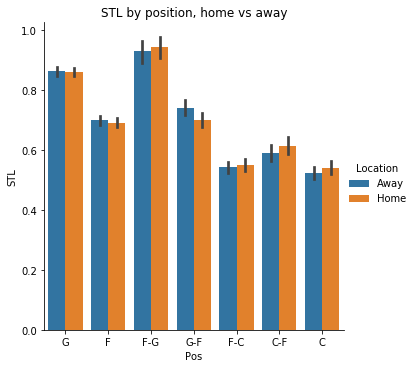

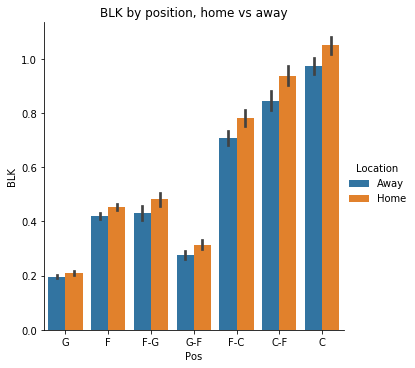

In [592]:
for m in metrics:
    sns.catplot(x = 'Pos', y = m, hue = 'Location', kind = 'bar', data = df)
    plt.title(str(m) + ' by position, home vs away')
    plt.show()

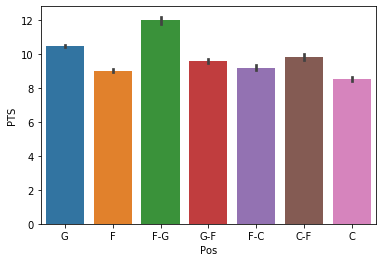

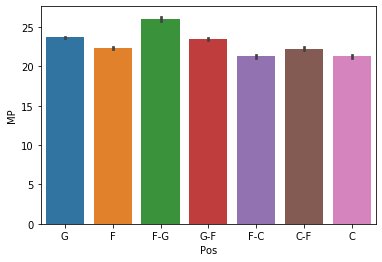

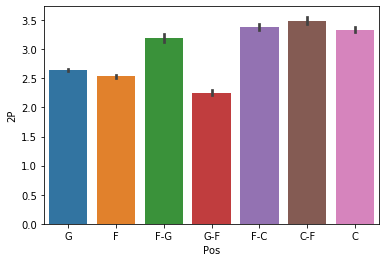

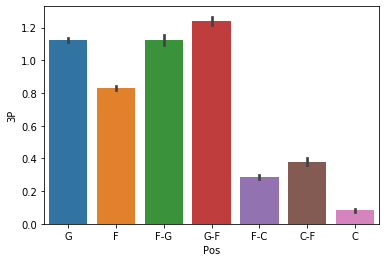

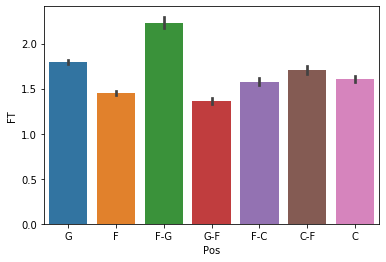

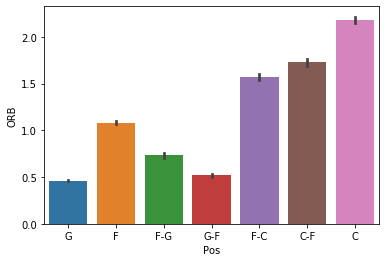

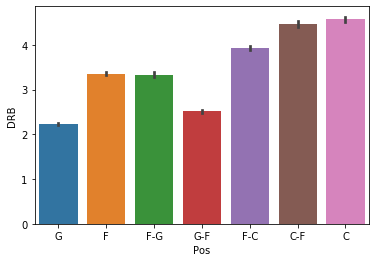

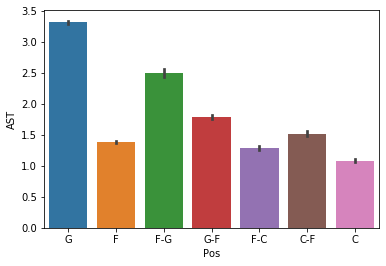

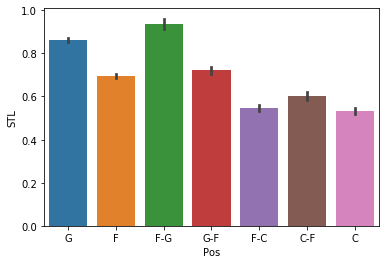

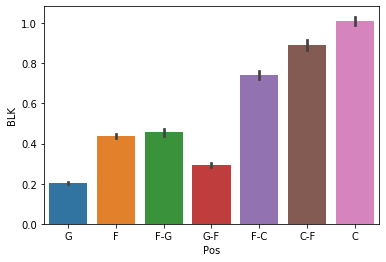

In [305]:
metrics = ['PTS', 'MP', '2P', '3P', 'FT', 'ORB', 'DRB', 'AST', 'STL', 'BLK']

for m in metrics:
    sns.barplot(x = 'Pos', y = m, data = df)
    plt.show()

Text(0.5, 1.0, 'Average points per player by position')

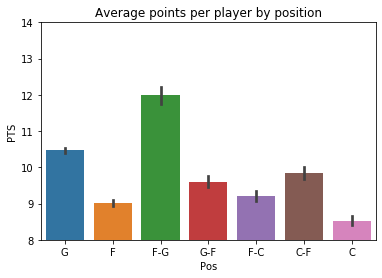

In [587]:
sns.barplot(x = 'Pos', y = 'PTS', data = df)
plt.ylim(8, 14)
plt.title('Average points per player by position')

## Analysis

These early visualizations help to give me an overall feel of the data. Specifically, they display a home advantage when looking at total points. This aligns with my expectations. Much of this carries over into player specific metrics too, with the home advantage being visible by player.<br>

Secondly they show how the different metrics for which I want to generate game lines for vary with position. C-Fs score the most 2 pointers, but much fewer 3 pointers. Cs make many blocks but very few 3 points. 
These differing distributions based purely from player positioning will feed into the model later on.


## Top Player Analysis

The top player will likely be the most common players bettors will flock to place bets on. The following vizualisaions look at their performance across various metrics.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

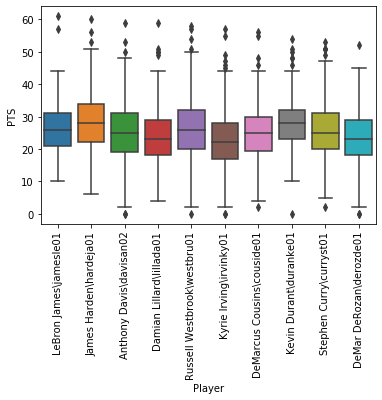

In [232]:
top_10_pts_avg = list(pd.DataFrame(df.groupby('Player').mean()['PTS'].nlargest(10)).reset_index()['Player'])
t10_df = df.loc[df['Player'].isin(top_10_pts_avg)]
sns.boxplot(x = t10_df['Player'], y = t10_df['PTS'])
plt.xticks(rotation= 90)

In [306]:
def player_stat_boxplot(column):
    sns.boxplot(x = t10_df['Player'], y = t10_df[column])
    plt.xticks(rotation= 90)
    plt.show()

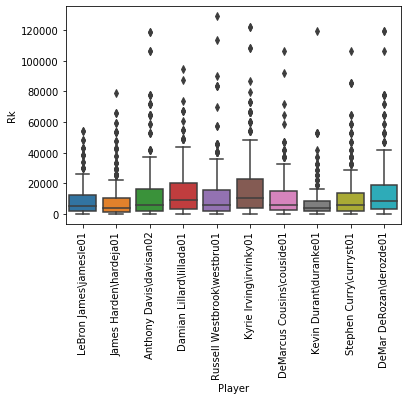

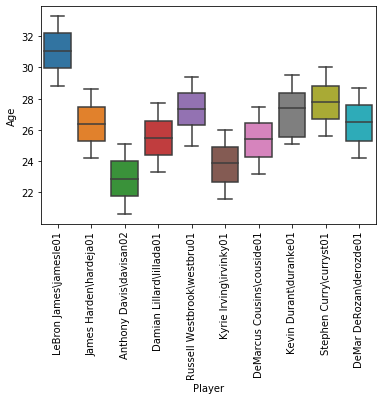

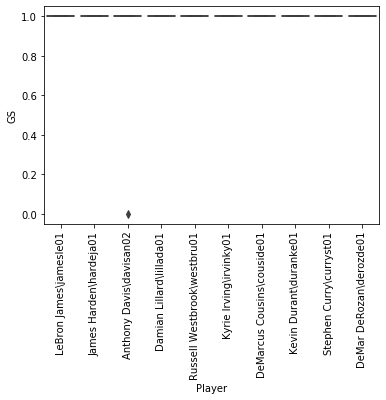

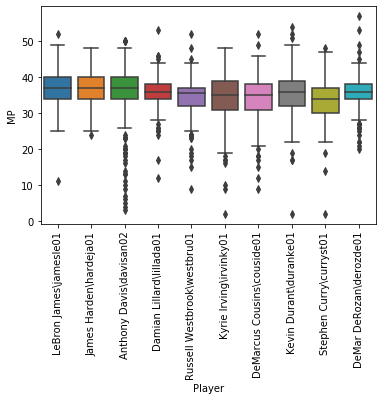

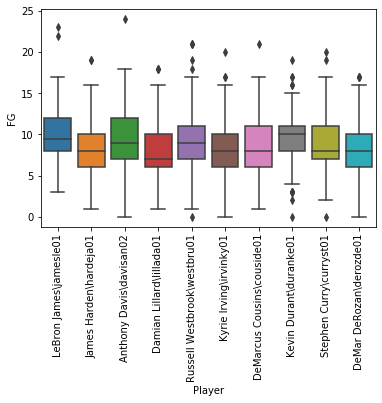

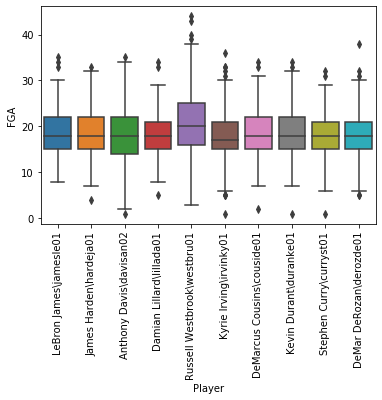

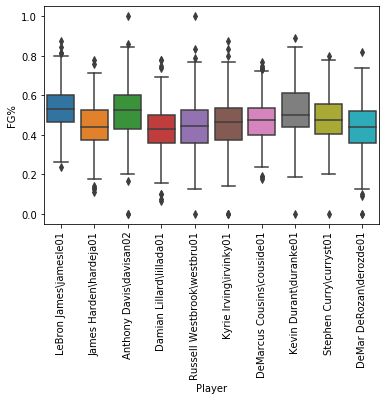

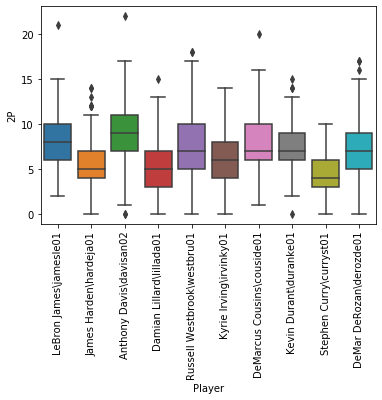

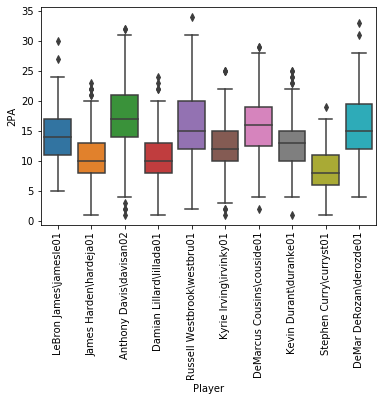

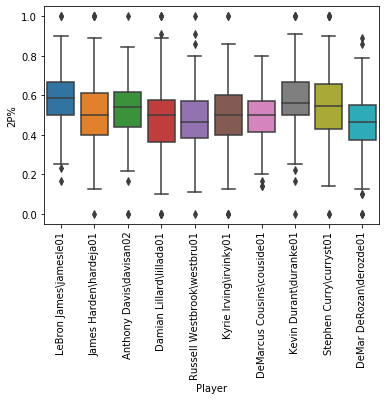

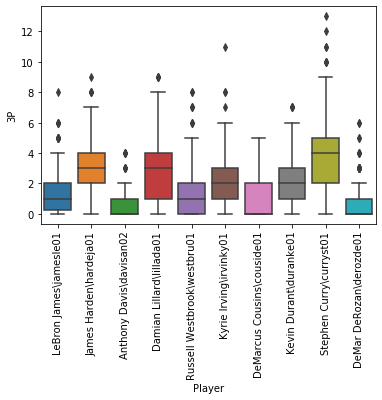

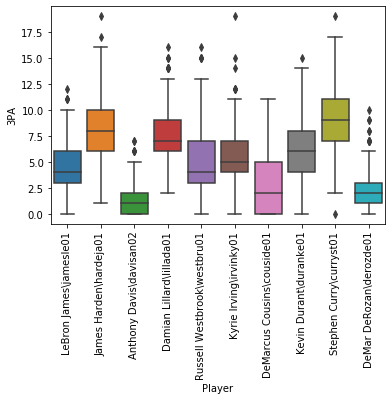

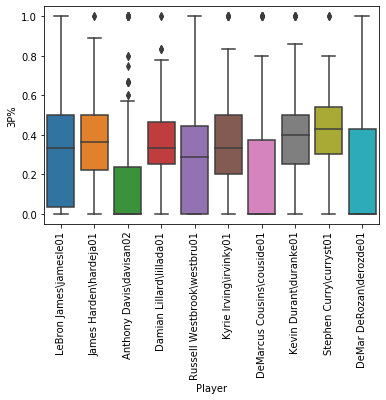

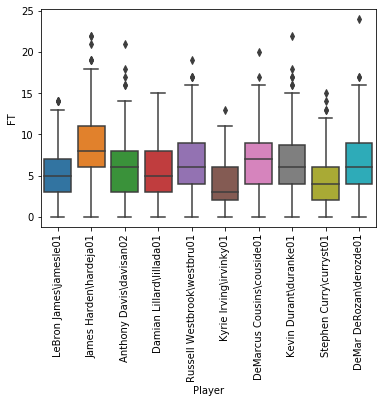

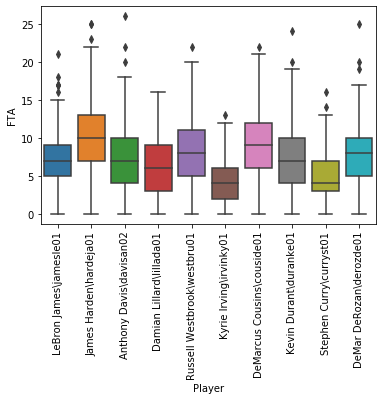

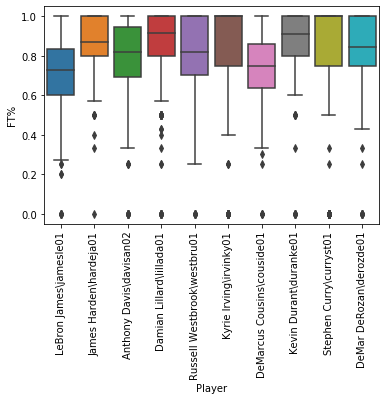

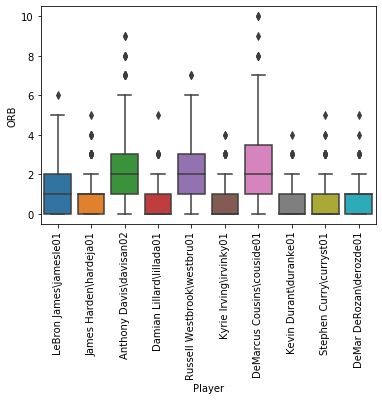

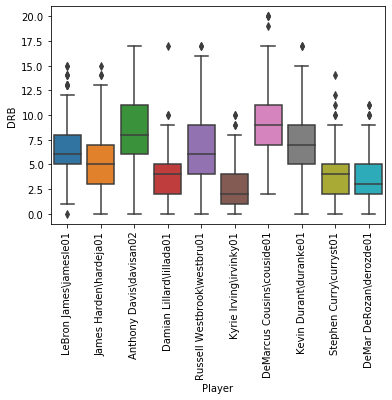

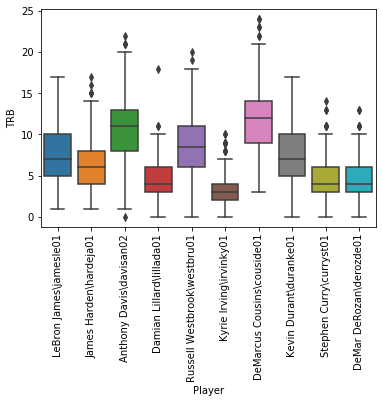

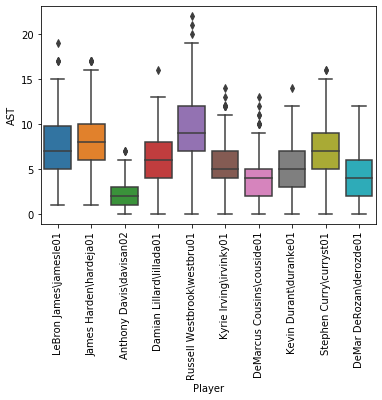

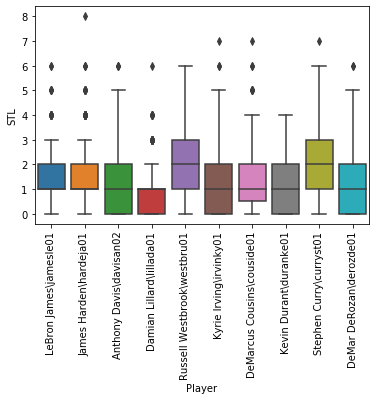

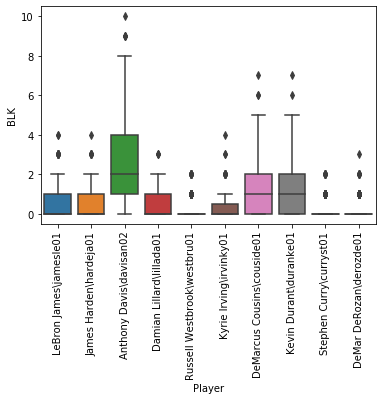

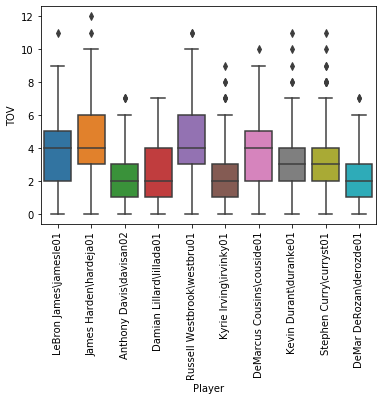

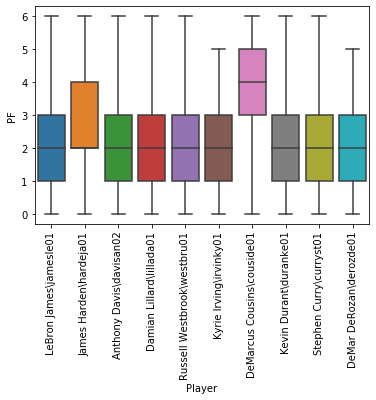

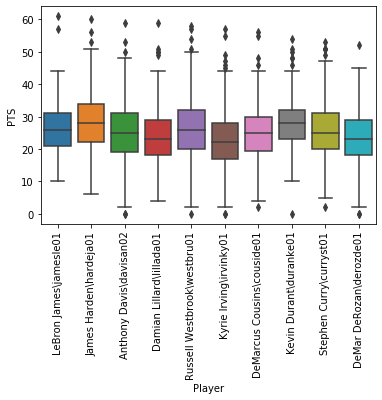

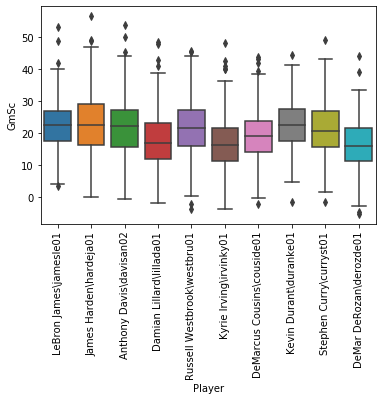

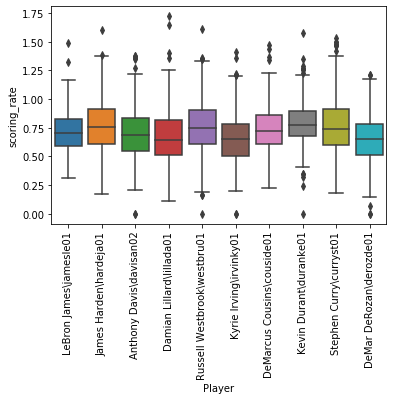

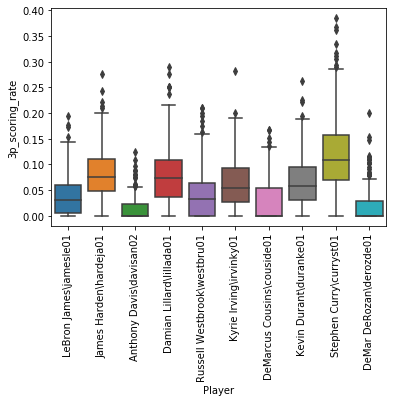

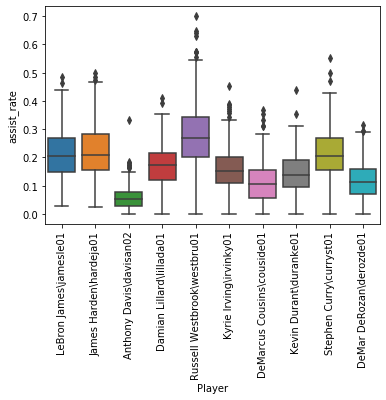

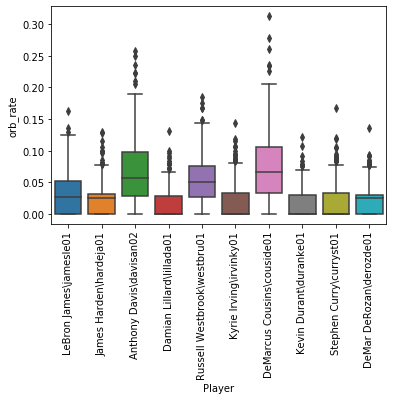

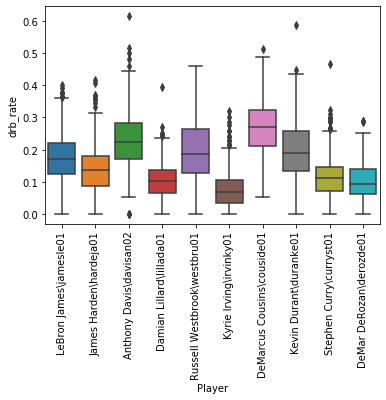

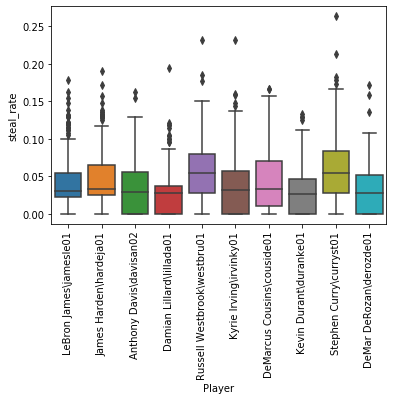

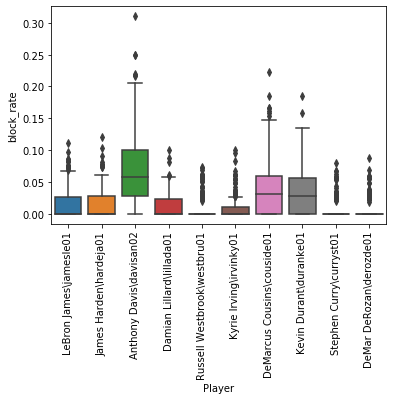

In [307]:
for col in num_cols:
    player_stat_boxplot(col)

## Player Insights

These top players score points in very different ways. For example, Stephen Curry has the highest 3P average, but a lower 2P average.
Again this is not unexpected, as player will lean towards scoring in different ways, based on their and their teams strengths, as well as the opposing teams weaknessess.  This further confirms the need to break down game lines by player.

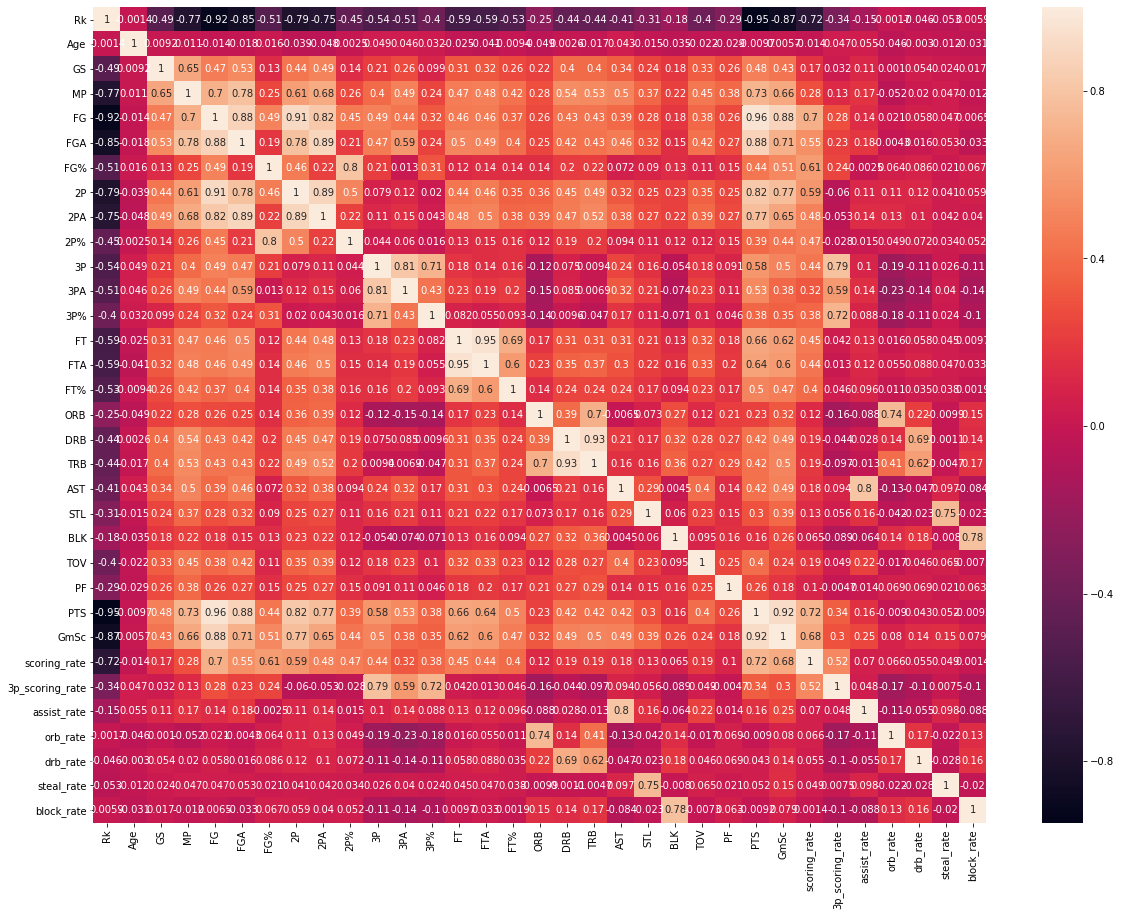

In [308]:
hm_df = df.dropna()
hm_df = hm_df.drop(columns = ['Player', 'Pos', 'Date', 'Tm', 'Location', 'Opp', 'Result'])
corr = hm_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot= True)

Correlation heatmaps are a good way of analsing all of the relationships between our variables in a quick and easy way. Some of the highest correlations to pull out are FT and FTA, GmSc and PTS.


## Minutes Played

Text(0, 0.5, 'Points Scored')

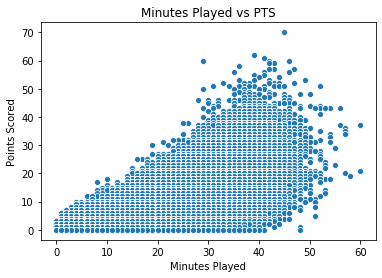

In [628]:
sns.scatterplot(df['MP'], df['PTS'])
plt.title('Minutes Played vs PTS')
plt.xlabel('Minutes Played')
plt.ylabel('Points Scored')


Although there looks to be a positive correlation, we have to be careful when analysing graphs like this. We cannot see clearly how many markers are at 0 PTS all along the y axis. Because we cannot see the points clearly, we do not know how they bunch within the graphs. Performing a simple linear regression and plotting its line of best fit between the two variables should help display the relationship. Looking at solely the top 10 players by PTS helps to vizualise the relationship, however we don't want to be basing a model of the top 10 players.

Text(0, 0.5, 'PTS')

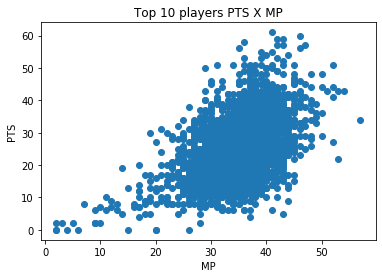

In [344]:
top_10_df = df.loc[df['Player'].isin(top_10_pts_avg)]
plt.scatter(top_10_df['MP'], top_10_df['PTS'])

plt.title('Top 10 players PTS X MP')
plt.xlabel('MP')
plt.ylabel('PTS')

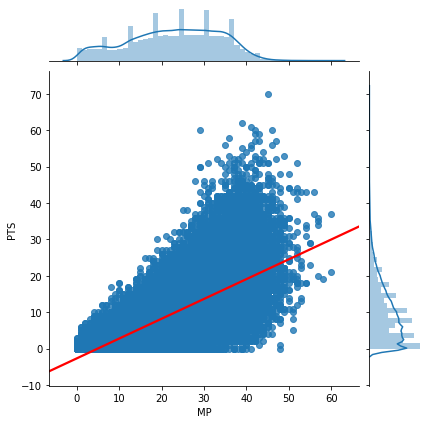

In [335]:
g = sns.jointplot(x="MP", y="PTS", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})



The above plot displays the relationship between the two variables within a 95% confidence interval. It is actually made up of one thick line, and a shaded area on each side of the line. The confidence interval is so small the shaded area does not really show up. From this we can be fairly certain that minutes played has a positive relationship with PTS. I assume this relationship is the same for other variables, as it makes sense that the more time a player is on court, the more time he has to perform his various roles, and make points, assists, blocks ETC. 

Going forward, I don't want this variation in minutes played to have an adverse impact on the models predictive potential. Some player may come on for a very short time period and perform very highly, others might play for a long time poorly, hence I add the following features to account for some level of productivity in the player, looking at their respective rates. We can also see that positive correlations exist with most other metrics. RK is negatively related to PTS, hence its negative relationship here

In [346]:
hm_df.corr()['MP']

Rk                -0.768772
Age                0.010917
GS                 0.653676
MP                 1.000000
FG                 0.703972
FGA                0.782748
FG%                0.247746
2P                 0.614801
2PA                0.679959
2P%                0.261060
3P                 0.395493
3PA                0.486697
3P%                0.242956
FT                 0.470473
FTA                0.481516
FT%                0.415103
ORB                0.278671
DRB                0.538101
TRB                0.527509
AST                0.503021
STL                0.373643
BLK                0.224151
TOV                0.447593
PF                 0.384663
PTS                0.726007
GmSc               0.658823
scoring_rate       0.277710
3p_scoring_rate    0.125419
assist_rate        0.168138
orb_rate          -0.052105
drb_rate           0.020440
steal_rate         0.046880
block_rate        -0.012426
Name: MP, dtype: float64

Text(0, 0.5, 'Probability')

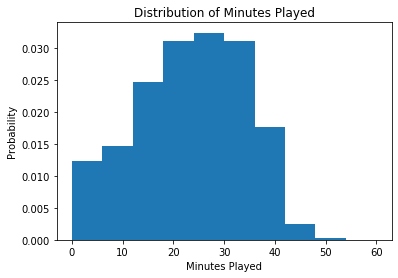

In [341]:
plt.hist(df['MP'], density = True)
plt.title ('Distribution of Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Probability')

In [ ]:
df['scoring_rate'] = df['PTS']/df['MP']
df['3p_scoring_rate'] = df['3P']/df['MP']
df['assist_rate'] = df['AST']/df['MP']
df['orb_rate'] = df['ORB']/df['MP']
df['drb_rate'] = df['DRB']/df['MP']
df['steal_rate'] = df['STL']/df['MP']
df['block_rate'] = df['BLK']/df['MP']

In [281]:
hm_df.corr()['Age']

Rk                -0.001425
Age                1.000000
GS                 0.009208
MP                 0.010917
FG                -0.013569
FGA               -0.018032
FG%                0.015752
2P                -0.039108
2PA               -0.048161
2P%                0.002451
3P                 0.049004
3PA                0.045987
3P%                0.031528
FT                -0.025394
FTA               -0.041334
FT%               -0.009387
ORB               -0.049050
DRB                0.002561
TRB               -0.017460
AST                0.043215
STL               -0.015287
BLK               -0.034652
TOV               -0.021781
PF                -0.028854
PTS               -0.009720
GmSc               0.005726
scoring_rate      -0.013608
3p_scoring_rate    0.047161
assist_rate        0.055341
orb_rate          -0.046168
drb_rate          -0.002961
steal_rate        -0.012141
block_rate        -0.030605
Name: Age, dtype: float64

Age doesn't seem to be a hugely related to performance.

In [32]:
df.to_csv('clean_df.csv')

In [411]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [431]:
normal_nums = ['MP', 'FG', '2P', '3P', 'FT', 'TRB', 'AST', 'PTS']

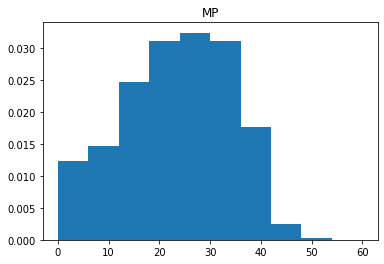

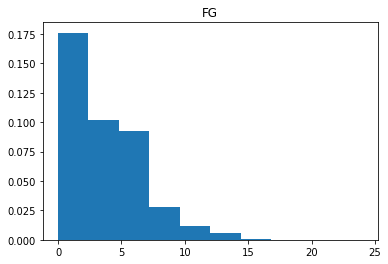

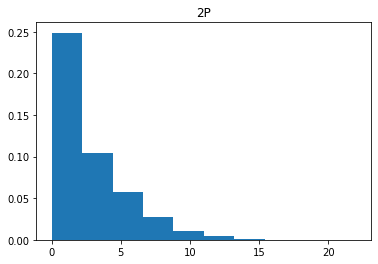

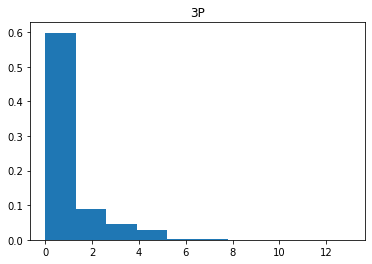

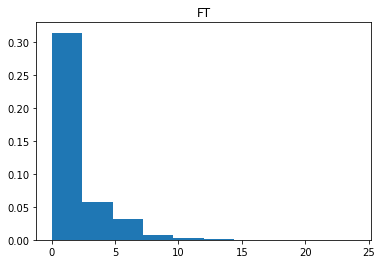

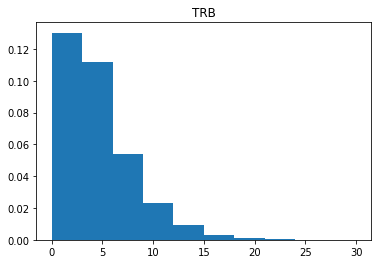

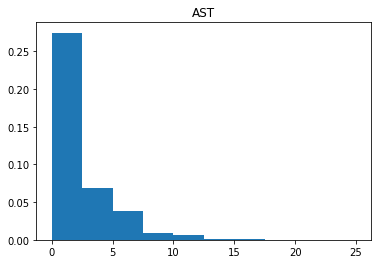

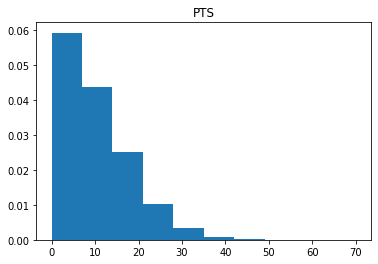

In [501]:
for col in normal_nums:
    plt.hist(df[col], density = True)
    plt.title(col)
    plt.show()

This final set of histograms lead me towards performing monte carlo simulations. Although these distributions aren't all perfectly normal, they are essentially close enough to normal when they are above 0 for my purposes. This assumption is addressed at the end. As long as I set any negative result from a sample from these distributions, the resulting distribution from repeated sampling would be effectively the samee. They also become closer to normal as we move into looking at individual player attributes rather than the whole team/league.

## Game Result Simulation - Team Level

Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. Because there is inherant randomness and chance in sports predicting, performing these simulations helps to build a distribution of potential outcomes. In essenece, randomly sampling from two known distributions can build a final, unknown distribution. This is begun below.

Begining at a team level is a simpler, higher level calculation before moving into player proposition markets.

In the inital team simulation, the function randomly takes samples from the points distribution of each teams scoring and conceding distributions. It outputs a winner based on this sampling. In the gamesim team matchup, this result is saved. The output is how often each team has won based on the number of simulations.
The next two functions keep track of the score, which is calculated with the same methods. This builds a distribution of the games outcomes, and leads me closer to analysing individual players.


In [361]:
def inital_team_simulation(team_1, team_2):
    
    avg_pts_scored_team_1 = df.loc[df['Tm'] == team_1].groupby('Date').sum()['PTS'].mean()
    std_pts_scored_team_1 = df.loc[df['Tm'] == team_1].groupby('Date').sum()['PTS'].std()
    
    avg_pts_conceded_team_1 = df.loc[df['Opp'] == team_1].groupby('Date').sum()['PTS'].mean()
    std_pts_conceded_team_1 = df.loc[df['Opp'] == team_1].groupby('Date').sum()['PTS'].std()
    
    avg_pts_scored_team_2 = df.loc[df['Tm'] == team_2].groupby('Date').sum()['PTS'].mean()
    std_pts_scored_team_2 = df.loc[df['Tm'] == team_2].groupby('Date').sum()['PTS'].std()
    
    avg_pts_conceded_team_2 = df.loc[df['Opp'] == team_2].groupby('Date').sum()['PTS'].mean()
    std_pts_conceded_team_2 = df.loc[df['Opp'] == team_2].groupby('Date').sum()['PTS'].std()
    
    team_1_score = (np.random.normal(avg_pts_scored_team_1,std_pts_scored_team_1)+ np.random.normal(avg_pts_conceded_team_2,std_pts_conceded_team_2))/2
    team_2_score = (np.random.normal(avg_pts_scored_team_2,std_pts_scored_team_2)+ np.random.normal(avg_pts_conceded_team_1,std_pts_conceded_team_1 ))/2
    if int(round(team_1_score)) > int(round(team_2_score)):
        return 1
    elif int(round(team_1_score)) < int(round(team_2_score)):
        return -1
    else: return 0

In [406]:
inital_team_simulation('GSW', 'TOR')

1

In [372]:
def gamesSim_of_team_matchup(team_1, team_2, ns):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = inital_team_simulation(team_1, team_2)
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print(team_1 +' win: ', round((team1win/(team1win+team2win+tie)*100), 3),'%')
    print(team_2 +' win: ', round((team2win/(team1win+team2win+tie)*100), 3),'%')
    print('Tie ', (tie/(team1win+team2win+tie)) * 100, '%')
    return 

In [373]:
gamesSim_of_team_matchup('GSW', 'TOR', 100)

GSW win:  54.0 %
TOR win:  40.0 %
Tie  6.0 %


In [374]:
def inital_team_score_simulation(team_1, team_2):
    
    avg_pts_scored_team_1 = df.loc[df['Tm'] == team_1].groupby('Date').sum()['PTS'].mean()
    std_pts_scored_team_1 = df.loc[df['Tm'] == team_1].groupby('Date').sum()['PTS'].std()
    
    avg_pts_conceded_team_1 = df.loc[df['Opp'] == team_1].groupby('Date').sum()['PTS'].mean()
    std_pts_conceded_team_1 = df.loc[df['Opp'] == team_1].groupby('Date').sum()['PTS'].std()
    
    avg_pts_scored_team_2 = df.loc[df['Tm'] == team_2].groupby('Date').sum()['PTS'].mean()
    std_pts_scored_team_2 = df.loc[df['Tm'] == team_2].groupby('Date').sum()['PTS'].std()
    
    avg_pts_conceded_team_2 = df.loc[df['Opp'] == team_2].groupby('Date').sum()['PTS'].mean()
    std_pts_conceded_team_2 = df.loc[df['Opp'] == team_2].groupby('Date').sum()['PTS'].std()
    
    team_1_score = (np.random.normal(avg_pts_scored_team_1,std_pts_scored_team_1)+ np.random.normal(avg_pts_conceded_team_2,std_pts_conceded_team_2))/2
    team_2_score = (np.random.normal(avg_pts_scored_team_2,std_pts_scored_team_2)+ np.random.normal(avg_pts_conceded_team_1,std_pts_conceded_team_1))/2
    
    return team_1_score, team_2_score

In [376]:
inital_team_score_simulation('GSW', 'TOR')

(111.43332975362517, 105.44600678214661)

In [680]:
def gamesSim_team_score(team_1, team_2, ns):
    gamesout = 0
    team1score = {}
    team2score = {}
    tie = 0
    for i in range(ns):
        home_score = round(inital_team_score_simulation(team_1, team_2)[0], 0)
        away_score = round(inital_team_score_simulation(team_1, team_2)[1], 0)
        gamesout += 1
        
        if home_score in team1score:
                team1score[home_score] += 1
        else:
                team1score[home_score] = 1
                
        if away_score in team2score:
                team2score[away_score] += 1
        else:
                team2score[away_score] = 1
        
                

    return team1score, team2score

In [684]:
%%time
output = gamesSim_team_score('GSW', 'TOR', 100)

CPU times: user 21.2 s, sys: 777 ms, total: 22 s
Wall time: 22.5 s


In [393]:
x = output[0]
y = output[1]

Text(0, 0.5, 'Number of occurances')

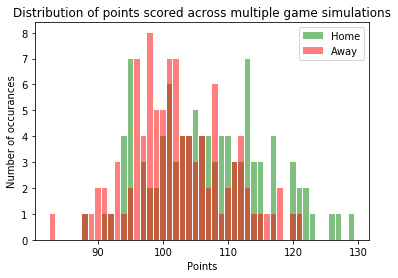

In [404]:
plt.bar(x.keys(), x.values(), color='g', alpha = 0.5)
plt.bar(y.keys(), y.values(), color='r', alpha = 0.5)
plt.legend(labels = ['Home', 'Away'])
plt.title('Distribution of points scored across multiple game simulations')
plt.xlabel('Points')
plt.ylabel('Number of occurances')

## Simulating One Game - Player Level

Having completed the Team level game simulation, I move on to analysing individual player markets. It essentially follows  a similar process to above, but with more positional and player variables included. In this first example it is build for just points and one but this is later generalised to all metrics

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


So building on the findings I made during EDA, I made several assumptions when looking at determining an individual players score:

 - There is a difference between how they individually perform at home and away
 - How many point they score is in some part determined by how many minutes they play
 - There is a difference in their score based on their position.

In [677]:
from NBA_functions import get_player_position_dict # For any team, return that teams lineup in the most recent year
                                                   # Along with their position
get_player_position_dict('GSW')

{'Andre Iguodala\\iguodan01': 'G-F',
 'Chris Boucher\\bouchch01': 'F',
 'Damian Jones\\jonesda03': 'F-C',
 'David West\\westda01': 'F-C',
 'Draymond Green\\greendr01': 'F',
 'JaVale McGee\\mcgeeja01': 'C',
 'Jordan Bell\\belljo01': 'F',
 'Kevin Durant\\duranke01': 'F-G',
 'Kevon Looney\\looneke01': 'F-C',
 'Klay Thompson\\thompkl01': 'G-F',
 'Nick Young\\youngni01': 'G-F',
 'Omri Casspi\\casspom01': 'F',
 'Patrick McCaw\\mccawpa01': 'G',
 'Quinn Cook\\cookqu01': 'G',
 'Shaun Livingston\\livinsh01': 'G',
 'Stephen Curry\\curryst01': 'G',
 'Zaza Pachulia\\pachuza01': 'C'}

# Points Scored

In [678]:
def player_total_points_func(home_team, away_team):
    
#     This function generates builds normal distributions for various 
#     attributing offensive factors to points scoring for each player, 
#     such as time played and points scored per minute. It also looks 
#     at defensive factors, such as how much the opposting team is 
#     conceding in general from players in each players repective positions.

#     It does this for both home and away
    
#     It then randomly selects, from those distributions 
#     (based on their probabilities of occuring) and the final number 
#     is an average of these two offensive and defensive factors. 

#    This has the effect of simulating one game, and returning the points each player scores
    
    # Collect player names of the home_team

    home_team_player_position_dict = get_player_position_dict(home_team)
    home_team_lineup_list = (home_team_player_position_dict.keys())
    
     # Collect player names of the away_team

    away_team_player_position_dict = get_player_position_dict(away_team)
    away_team_lineup_list = (away_team_player_position_dict.keys())
    
    home_player_scores_dict = {}
    
    for x in home_team_lineup_list:
        
        # How long an individual home team player plays at home
    
        home_minutes_played = np.random.normal(
            df.loc[(df['Player'] == x) & 
            (df['Location'] =='Home')]['MP'].mean(),
             df.loc[(df['Player'] == x) & 
            (df['Location'] =='Home')]['MP'].std())
        
        # How effective they are at scoring points at home
        
        home_player_scoring_effectiveness =  np.random.normal(
            df.loc[(df['Player'] == x) & 
                   (df['Location'] =='Home')]['scoring_rate'].mean()
                     ,df.loc[(df['Player'] == x) & 
                             (df['Location'] =='Home')]['scoring_rate'].std())

    # How often does the team that is away concede when they are away, 
    # broken down by each players position
    # Note here location is also technically 'home' because we are 
    # looking at them as an Opp
    
        away_conceding_avg = pd.DataFrame(
            df.loc[(df['Opp'] == away_team) & 
                   (df['Location'] == 'Home')].groupby('Pos').mean()).reset_index()
        
        away_conceding_std = pd.DataFrame(
            df.loc[(df['Opp'] == away_team) & 
                   (df['Location'] == 'Home')].groupby('Pos').std()).reset_index()

        away_concede_by_position_avg = away_conceding_avg.loc[away_conceding_avg['Pos'] == 
                               home_team_player_position_dict[x]]['PTS']
        
        away_concede_by_position_std = away_conceding_std.loc[away_conceding_std['Pos'] == 
                               home_team_player_position_dict[x]]['PTS']

        away_positional_conceding = np.random.normal(
            away_concede_by_position_avg, away_concede_by_position_std)
        
             
        # Force negatives to be 0
        
        parameters = [home_minutes_played, home_player_scoring_effectiveness, 
                      away_positional_conceding]
        parameters = [0 if x<= 0 else x for x in parameters]
        
        # Convert to integer as a player cannot score 0.5 points
        # If the output of the simulation is not a float, it is likely 'NaN'. In this
        # case, the output is set to 'NA', so we can properly identify this error later.
        # We cannot set it to False or 0 as we need it to be sufficiently different when the 
        # simulation fails, for easy identification
        try:
            home_player_score = int((((parameters[0] * parameters[1]) + parameters[2])/2))
        except:
            home_player_score = 'NA'
        
        # Add this players score to the team dictionary
        home_player_scores_dict[x] = home_player_score
        
    # Same for the Away Team
        
    away_player_scores_dict = {}
    
    for x in away_team_lineup_list:

        # How long an individual away team player plays
        
        away_minutes_played = np.random.normal(
            df.loc[(df['Player'] == x) & 
                   (df['Location'] =='Away')]['MP'].mean(),
                     df.loc[(df['Player'] == x) & 
                            (df['Location'] =='Away')]['MP'].std())
        
        # How effective they are at scoring points
        
        away_player_scoring_effectiveness =  np.random.normal(
            df.loc[(df['Player'] == x) & 
                   (df['Location'] =='Away')]['scoring_rate'].mean()
                     ,df.loc[(df['Player'] == x) & 
                             (df['Location'] =='Away')]['scoring_rate'].std())

        
    # How often does the team that is home concede when they are home 
    # Note here location is also technically 'away' because we are looking at them as an Opp
    
        home_conceding_avg = pd.DataFrame(
            df.loc[(df['Opp'] == home_team) & 
                   (df['Location'] == 'Away')].groupby('Pos').mean()).reset_index()
        home_conceding_std = pd.DataFrame(
            df.loc[(df['Opp'] == home_team) & 
                   (df['Location'] == 'Away')].groupby('Pos').std()).reset_index()

        home_concede_by_position_avg = home_conceding_avg.loc[home_conceding_avg['Pos'] == 
                               away_team_player_position_dict[x]]['PTS']
        
        home_concede_by_position_std = home_conceding_std.loc[home_conceding_std['Pos'] ==
                               away_team_player_position_dict[x]]['PTS']

        home_positional_conceding = np.random.normal(
            home_concede_by_position_avg, home_concede_by_position_std)
        
        # Force negatives to be 0
        
        parameters = [away_minutes_played, away_player_scoring_effectiveness, 
                      home_positional_conceding]
        
        parameters = [0 if x<= 0 else x for x in parameters]
        
        try:
            away_player_score = int((((parameters[0] * parameters[1]) + parameters[2])/2))
        except:
            away_player_score = 'NA'
            
        away_player_scores_dict[x] = away_player_score
        

    return home_player_scores_dict, away_player_scores_dict


In order to keep the rest of the notebook clean, I have saved the rest of the functions in a NBA_functions.py, however I will explain what they do going forward. This player function simulates one game, and builds distributions on the following metrics to predict a players score:


- How long a player plays
- How many points they score per minute 
- How many points the opposing team concedes from that players position

These distributions are built only on the perfomance of that player or team in their respective locations, to take account of the fact that players may have higher scoring rates at home or away, and teams may have different postitional leaks home or away.

For example how many points they score per minute is build solely on their average scoring rate at home for home players, and average scoring rate away for away players. These scores are rounded to integers.

In [681]:
%%time

from NBA_functions import player_total_points_func

player_total_points_func('GSW', 'TOR')

CPU times: user 3.32 s, sys: 325 ms, total: 3.64 s
Wall time: 4.17 s


({'Andre Iguodala\\iguodan01': 6,
  'Chris Boucher\\bouchch01': 'NA',
  'Damian Jones\\jonesda03': 4,
  'David West\\westda01': 13,
  'Draymond Green\\greendr01': 9,
  'JaVale McGee\\mcgeeja01': 7,
  'Jordan Bell\\belljo01': 4,
  'Kevin Durant\\duranke01': 19,
  'Kevon Looney\\looneke01': 5,
  'Klay Thompson\\thompkl01': 18,
  'Nick Young\\youngni01': 13,
  'Omri Casspi\\casspom01': 12,
  'Patrick McCaw\\mccawpa01': 8,
  'Quinn Cook\\cookqu01': 12,
  'Shaun Livingston\\livinsh01': 12,
  'Stephen Curry\\curryst01': 17,
  'Zaza Pachulia\\pachuza01': 6},
 {'Alfonzo McKinnie\\mckinal01': 8,
  'Bruno Caboclo\\cabocbr01': 0,
  'C.J. Miles\\milescj01': 6,
  'DeMar DeRozan\\derozde01': 25,
  'Delon Wright\\wrighde01': 7,
  'Fred VanVleet\\vanvlfr01': 2,
  'Jakob Pöltl\\poeltja01': 3,
  'Jonas Valančiūnas\\valanjo01': 7,
  'Kyle Lowry\\lowryky01': 26,
  'Lorenzo Brown\\brownlo01': 7,
  'Lucas Nogueira\\noguelu01': 4,
  'Malachi Richardson\\richama01': 7,
  'Malcolm Miller\\millema01': 6,
  'Nig

## 3 Pointers

In [443]:
from NBA_functions import player_3Pers_func

This function Performs similarly to the one above, but with the obvious focus on three pointers.

Here the distributions built and sampled from are based on:


Offensive stats:
- How long a player plays
- How many 3P they score per minute

- How many attempts they make
- What % of these attempts go in 

Defensive stats:
- How many 3P does the opposing team concede to players in that position
- How many attempts to they let occur
- What % of these attempts go in

As well as being rounded to integers, as I am dealing with lower numbers, the distributions generated include numbers less than 0. Obviously players cannot score negative 3P, so any negative numbers are set to 0 after sampling. This ensure that the distribution is similar enough to the true distribution (I.E lots of 0s)


# Assists, Rebounds, Blocks and Steals

In [449]:
from NBA_functions import player_assists_func, player_rebounds_func
from NBA_functions import player_blocks_func, player_steals_func

These functions all perform similarly, with the same structure as the previous funciton. The only caveat is that player rebounds is first broken down into offensive and defensive rebounds, before being combined into total rebounds. This is because players in different positions may be more appropriately placed to earn a certain type of rebound. The output of all of these functions is dictionaries, containing each player and their score for that variable.

# Multiple Game Simulations

The following function then begins to keep track of the results of each individual running of the single simulations above. It counts how many time a particular score occurs, to build a probability distribution of the score from a particular player.

In [692]:
def get_player_score(player, home_team, away_team, x, ns, display = True):
    
    # This function begins to keep track of all the individual results of previous simulations
    
    player_score = {}
    for i in range(ns):
        score = player_total_points_func(home_team, away_team)[x][player]
        
        if score in player_score:
                player_score[score] += 1
        else:
                player_score[score] = 1
                
    probability_sum = 0
    for k, v in player_score.items():
        player_score[k] = round(((v/ns)), 2)
        probability_sum += v/ns
    if display == True:
        
        od1 = collections.OrderedDict(sorted(player_score.items()))
        for k, v in od1.items(): print('Player: {} Score: {} : {}'.format(player, k, v))
    else:
        pass
    return player_score

In [693]:
%%time
sc_example = get_player_score('Stephen Curry\\curryst01', 'GSW', 'TOR', 0, 100, True )

Player: Stephen Curry\curryst01 Score: 3 : 0.01
Player: Stephen Curry\curryst01 Score: 4 : 0.01
Player: Stephen Curry\curryst01 Score: 5 : 0.01
Player: Stephen Curry\curryst01 Score: 6 : 0.01
Player: Stephen Curry\curryst01 Score: 8 : 0.02
Player: Stephen Curry\curryst01 Score: 9 : 0.06
Player: Stephen Curry\curryst01 Score: 10 : 0.05
Player: Stephen Curry\curryst01 Score: 11 : 0.01
Player: Stephen Curry\curryst01 Score: 12 : 0.04
Player: Stephen Curry\curryst01 Score: 13 : 0.11
Player: Stephen Curry\curryst01 Score: 14 : 0.09
Player: Stephen Curry\curryst01 Score: 15 : 0.04
Player: Stephen Curry\curryst01 Score: 16 : 0.07
Player: Stephen Curry\curryst01 Score: 17 : 0.04
Player: Stephen Curry\curryst01 Score: 18 : 0.07
Player: Stephen Curry\curryst01 Score: 19 : 0.04
Player: Stephen Curry\curryst01 Score: 20 : 0.05
Player: Stephen Curry\curryst01 Score: 21 : 0.05
Player: Stephen Curry\curryst01 Score: 22 : 0.04
Player: Stephen Curry\curryst01 Score: 23 : 0.03
Player: Stephen Curry\curr

The following functions perform similary. They run the inital simulation N times, and keep track of the rusult and convert it to build a probability distribution for each attribute.

In [453]:
from NBA_functions import get_player_score, get_player_3P, get_player_blocks
from NBA_functions import get_player_assists, get_player_rebounds, get_player_steals

# Full Game Simulation

This final function is a culmination of all the previous work. It runs all the previous functions, and outputs for each player on each team, their distribution of each of the metrics which I am trying to build gamelines for, from the number of simulations.

The following cell takes a very long time to run (100 simulations took 22 Hrs) so be wary. This is addressed further in the notebook with some potential ways to improve. The cell is commented out as a warning not to run by accident. CSV's of the finished product can be found attatched for this particular simulation can be found attatched. The progress was to ensure the kernal was continuously running and had not stopped.

In [147]:
# %%time
# from NBA_functions import FullGameSim
# gam_sim_results = FullGameSim('GSW', 'TOR', 100 , False)

Progress: 0%
Progress: 0%
Progress: 1%
Progress: 1%
Progress: 2%
Progress: 2%
Progress: 102.85714285714285%
Progress: 3%
Progress: 3%
Progress: 4%
Progress: 4%
Progress: 5%
Progress: 5%
Progress: 205.7142857142857%
Progress: 6%
Progress: 6%
Progress: 7%
Progress: 7%
Progress: 8%
Progress: 8%
Progress: 308.57142857142856%
Progress: 9%
Progress: 9%
Progress: 10%
Progress: 10%
Progress: 10%
Progress: 11%
Progress: 411.4285714285714%
Progress: 11%
Progress: 12%
Progress: 12%
Progress: 13%
Progress: 13%
Progress: 14%
Progress: 514.2857142857142%
Progress: 14%
Progress: 15%
Progress: 15%
Progress: 16%
Progress: 16%
Progress: 17%
Progress: 617.1428571428571%
Progress: 17%
Progress: 18%
Progress: 18%
Progress: 19%
Progress: 19%
Progress: 20%
Progress: 719.9999999999999%
Progress: 20%
Progress: 20%
Progress: 21%
Progress: 21%
Progress: 22%
Progress: 22%
Progress: 822.8571428571428%
Progress: 23%
Progress: 23%
Progress: 24%
Progress: 24%
Progress: 25%
Progress: 25%
Progress: 925.7142857142858%
P

# Converting to Game Lines

In [200]:
from NBA_functions import final_game_line_df 

This final function accesses each metric for each player, and puts them in ascending order. It then uses the probability distribution of each of these metrics to build a cumulative probability. When the cumulative probability reaches 0.5, this is where the line is set for this player, and inserted into the dataframe of all player lines. Therefore the final csv cumulative probability column can be interpreted as the probability of reaching that line or less.

Following on from the previous example of Stephen Curry, his points line is produced as follows:


In [496]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [499]:
new_df = pd.DataFrame.from_records(sc_example, index = range(0, len(sc_example))).T.reset_index()
new_df = new_df[['index', 0]]
new_df = new_df.rename(columns={'index': 'points', 0: 'probability'})
player_df = new_df.sort_values(by = 'points')

player_df['cumulative_points_probability'] = float(0)
running_total = float(0)
player_df.reset_index(drop= True, inplace = True)
player_df['player_0.5_total_point_line'] = 'NA'

for i in range(0, len(player_df)):

    running_total += player_df['probability'][i]
    player_df['cumulative_points_probability'][i] = running_total
    
player_df.loc[(player_df['cumulative_points_probability']-0.5).abs().argsort()[:1], 'player_0.5_total_point_line'] = player_df['points']
player_df.loc[player_df['player_0.5_total_point_line'] != 'NA']

,points,probability,cumulative_points_probability,player_0.5_total_point_line
11,16,0.09,0.48,16


In [500]:
home_game_lines = final_game_line_df(gam_sim_results, 0)
away_game_lines = final_game_line_df(gam_sim_results, 1)

home_game_lines = home_game_lines.round(2)
away_game_lines = away_game_lines.round(2)

In [205]:
home_game_lines.columns = (['player', 'point_line', 'points_probability', '3P_line',
       '3P_probability', 'assist_line', 'assist_probability', 'rebound_line',
       'rebound_probability', 'steal_line', 'steal_probability', 'block_line',
       'block_probability'])
away_game_lines.columns = (['player', 'point_line', 'points_probability', '3P_line',
       '3P_probability', 'assist_line', 'assist_probability', 'rebound_line',
       'rebound_probability', 'steal_line', 'steal_probability', 'block_line',
       'block_probability'])

In [207]:
home_game_lines.to_csv('home_player_lines.csv')
away_game_lines.to_csv('away_player_lines.csv')

In [209]:
sc_mean = df.loc[df['Player'] == 'Stephen Curry\\curryst01']['STL'].mean()
sc_std = df.loc[df['Player'] == 'Stephen Curry\\curryst01']['STL'].std()

In [523]:
# Sanity check. In what % games does SC make 3 or more rebounds. Currently, the projected game line is 3

a = len(df.loc[(df['Player'] == 'Stephen Curry\\curryst01') & (df['TRB'] >= 3)]['TRB'])
b = len(df.loc[(df['Player'] == 'Stephen Curry\\curryst01')])
a /( a+b)

0.4505988023952096

## If a new player joined, are they any methods we can use to price these markets?

If we had no data on a previous player, we can adjust the simulation to use simply the positional average of the offensive, and defensive team to construct an expected distribution of their score in that variable. As well as this we can look at team averages, for example how many 3 pointers we expect GSW to score against TOR (and how many TOR concede), and then what proportion of that is from this new players position. On top of that, we can look at league averages on that position. This could help provide a distribution prediction for an unseen player. 

# Moving Forward

## Speed improvement

A limiting factor in this method of generating game lines is its speed. The time required to perform the simulations could easily be increased through several methods:
- Vectorizing everything would lead to large speed improvements, potentially 50x or more. (Had I known that speed would have been a problem early on, this would have been done from the start). This would take out many of the loops that are slowing the final function down considerably
- Following this, multithreading or parrellelizing the operations could result in speed improvements of up to 4x
- These together could improve speed by 200x or more, would result in the final function of full game simulation 100 times in less than 7 minutes.

- It is likely people are most inclined to bet on lines from certain players within teams, so perhaps performing the line calculations for only the top n players in that area could lead to a 2-6x improvement depending on n
- Some of the simulations may be unreasonably granular, and taking a higher level approach (such as looking at a teams total points conceded instead of they points coneded by position). Redoing the model  with these different parameters and analysing change in projects would be useful

## Code rewriting

- The game is simulated a new time for each player, and each attribute. This looping may generate unnecessarily large volumes of repeated data. Rewriting each individual function (some of which can be combined) could increase speed and limit repitition.
- Some of the functions for different variables are very similar. It may be possible to rewrite these to form much more efficient code.

## Projection Accuracy Improvement

Another issue with these method of generating game lines is that it does not make use of all the data available to us. Including FT, 2P and 3P to as well as PTS to generate a PTS prediction, could prove beneficial.
On top of this, looking at PF, to help with FT, ORB, DRB and potentially steals could prove helpful. 
GmSc is also not used, and would likely prove useful in any machine learning model.

The large assumption made is that the disribtuion of variables by player are normal when they are above zero. This may not necessarily be the case and could be limiting accurate simulation. In fact, it looks like many of them are positively skewed due to the high number of 0 values. It is likely therefore, that our assumptions are an overestimate.

By analysing each variable by player, and sampling from that distribution instead of simply a normal distribution, we will move closer to simulating the real world.


## Alternative Models

To take account of some of the unused data, as well as the fact that this is all historical, one could add company data which could aid in building further machine learning or deep learning models without the need for simulation.

Including data on historic lines, as well as volume of bets placed on either side could take advantage of other potential theories, such as free market hypothesis, which suggests the crowd is right. If the companies aim is to avoid speculating on results, and simply hoping a 50/50 line would attract bets in even volume on either side, it would be possible to utilize this volumne data for machine learning models. Initially it would take some time to train, however the end result may be reached faster than simulating a match up every time.
